<a href="https://colab.research.google.com/github/Lanssser/inf2178-experimentaldesign-w24/blob/main/Assignment1/Mingli_Wang_A1/INF2178_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 1. Import Libraries and Load Data

In [31]:
#=====Step 0=====
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from google.colab import files
from scipy.stats import ttest_ind

In [32]:
#Please upload INF2178_A1_data.xlsx dataset from your local disk.
uploaded = files.upload()

Saving INF2178_A1_data.xlsx to INF2178_A1_data (1).xlsx


##Step 2. Read and Analyze Dataset

In [33]:
#Read and load raw data
data = pd.read_excel('INF2178_A1_data.xlsx',sheet_name = 'data', na_values = '..')
data.head(20)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [34]:
# A summary overview of the data to check for missing values
summary = {
    "Total Rows": len(data),
    "Total Columns": len(data.columns),
    "Column Names": data.columns.tolist(),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Unique Values": data.nunique().to_dict(),
    "First Date": data['OCCUPANCY_DATE'].min(),
    "Last Date": data['OCCUPANCY_DATE'].max()
}

summary_df = pd.DataFrame.from_dict(summary, orient='index')
summary_df.columns = ['Value']
summary_df

,Value
Total Rows,50944
Total Columns,14
Column Names,"[OCCUPANCY_DATE, ORGANIZATION_NAME, PROGRAM_ID..."
Data Types,"{'OCCUPANCY_DATE': datetime64[ns], 'ORGANIZATI..."
Missing Values,"{'OCCUPANCY_DATE': 0, 'ORGANIZATION_NAME': 0, ..."
Unique Values,"{'OCCUPANCY_DATE': 365, 'ORGANIZATION_NAME': 3..."
First Date,2021-01-01 00:00:00
Last Date,2021-12-31 00:00:00


##Step 3. Feature Engineering

###3.1 Occupany Rate

In [35]:
data_sheet = data

# Splitting the 'data' sheet into two tables based on 'CAPACITY_TYPE'
dt_room_based = data_sheet[data_sheet['CAPACITY_TYPE'] == 'Room Based Capacity']
dt_bed_based = data_sheet[data_sheet['CAPACITY_TYPE'] != 'Room Based Capacity']

#Show results
dt_bed_based

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
10,2021-01-01,Christie Ossington Neighbourhood Centre,12011,Christie Ossington Men's Hostel,Men,Emergency,Shelter,Base Shelter and Overnight Services System,22,Bed Based Capacity,24.0,22.0,NaN,NaN
11,2021-01-01,Christie Ossington Neighbourhood Centre,13611,Christie Ossington Men's Hostel South,Men,Emergency,Shelter,Base Shelter and Overnight Services System,8,Bed Based Capacity,12.0,8.0,NaN,NaN
21,2021-01-01,City of Toronto,11815,Downsview Dells Bedded Program,Men,Transitional,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,12.0,10.0,NaN,NaN
25,2021-01-01,City of Toronto,16232,Family Residence - Main Site - Winter Program,Families,Emergency,Shelter,COVID-19 Response,11,Bed Based Capacity,12.0,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,2021-12-31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,2021-12-31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,2021-12-31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN


In [36]:
# Calculate room-based shelter occupancy rate
dt_room_based['ROOM_OCCUPANCY_RATE'] = dt_room_based['OCCUPIED_ROOMS'] / dt_room_based['CAPACITY_ACTUAL_ROOM']

# Calculate bed-based shelter occupancy rate
dt_bed_based['BED_OCCUPANCY_RATE'] = dt_bed_based['OCCUPIED_BEDS'] / dt_bed_based['CAPACITY_ACTUAL_BED']

# Dropping bed columns for room-based, and room columns for bed-baased
dt_room_based = dt_room_based.drop(columns=['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS'])
dt_bed_based = dt_bed_based.drop(columns=['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'])

# Show result
dt_room_based

<ipython-input-36-d166e0dbe254>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_room_based['ROOM_OCCUPANCY_RATE'] = dt_room_based['OCCUPIED_ROOMS'] / dt_room_based['CAPACITY_ACTUAL_ROOM']
<ipython-input-36-d166e0dbe254>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_bed_based['BED_OCCUPANCY_RATE'] = dt_bed_based['OCCUPIED_BEDS'] / dt_bed_based['CAPACITY_ACTUAL_BED']


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,ROOM_OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,29.0,26.0,0.896552
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,3.0,3.0,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,28.0,23.0,0.821429
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,17.0,17.0,1.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,14.0,13.0,0.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50920,2021-12-31,The Salvation Army of Canada,15491,SA Scarborough Hotel - Men's Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,128,Room Based Capacity,128.0,128.0,1.000000
50923,2021-12-31,The Salvation Army of Canada,15871,Salvation Army New Hope Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,76,Room Based Capacity,76.0,76.0,1.000000
50927,2021-12-31,Toronto Community Hostel,12274,Toronto Community Hostel (Families),Families,Emergency,Shelter,Base Shelter and Overnight Services System,10,Room Based Capacity,3.0,3.0,1.000000
50932,2021-12-31,WoodGreen Red Door Family Shelter,11791,Red Door - Family Shelter,Families,Emergency,Shelter,Base Shelter and Overnight Services System,74,Room Based Capacity,23.0,22.0,0.956522


###Occupancy Rate Graphs

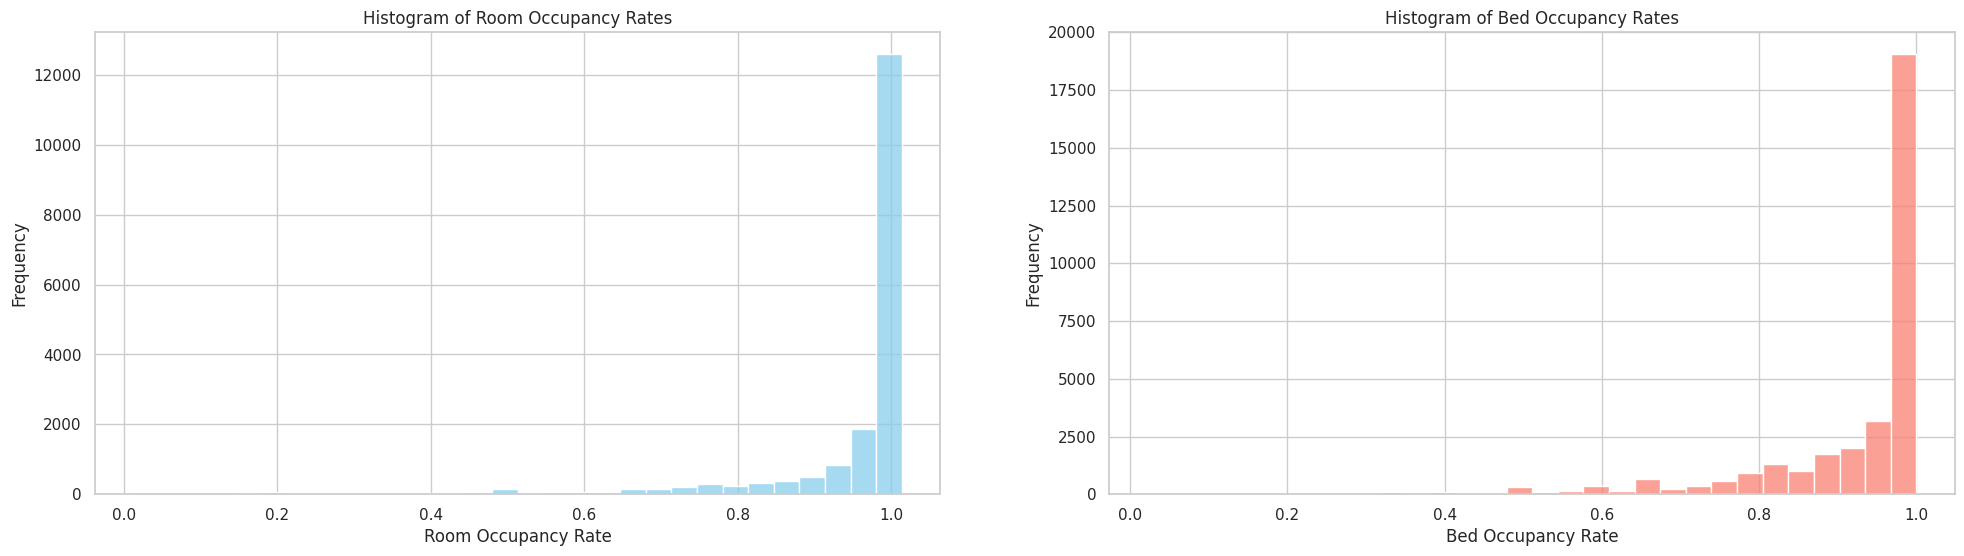

In [37]:

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

# plot for Room Occupancy Rate
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(dt_room_based['ROOM_OCCUPANCY_RATE'], kde=False, color="skyblue", bins=30)
plt.title('Histogram of Room Occupancy Rates')
plt.xlabel('Room Occupancy Rate')
plt.ylabel('Frequency')

# plot for Bed Occupancy Rate
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(dt_bed_based['BED_OCCUPANCY_RATE'], kde=False, color="salmon", bins=30)
plt.title('Histogram of Bed Occupancy Rates')
plt.xlabel('Bed Occupancy Rate')
plt.ylabel('Frequency')

plt.show()


In [38]:
#Check occupancy mean for each types
#dt_bed_based['BED_OCCUPANCY_RATE'].mean()
dt_room_based['ROOM_OCCUPANCY_RATE'].mean()

0.9340865091561478

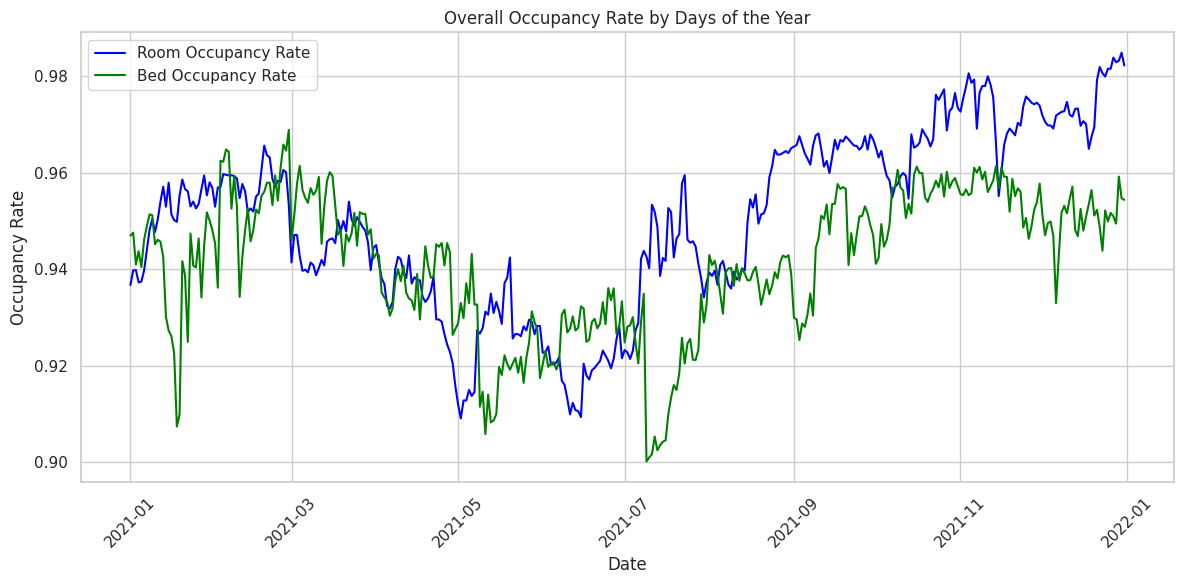

In [39]:
# Occupancy Rate = Occupied / Actual Capacity
# Calculating occupancy rates by day
room_occupancy_by_day = dt_room_based.groupby('OCCUPANCY_DATE').apply(
    lambda x: (x['OCCUPIED_ROOMS'].sum() / x['CAPACITY_ACTUAL_ROOM'].sum())).reset_index(name='ROOM_OCCUPANCY_RATE')
bed_occupancy_by_day = dt_bed_based.groupby('OCCUPANCY_DATE').apply(
    lambda x: (x['OCCUPIED_BEDS'].sum() / x['CAPACITY_ACTUAL_BED'].sum())).reset_index(name='BED_OCCUPANCY_RATE')

# Plotting the results in a line graph
plt.figure(figsize=(12, 6))
plt.plot(room_occupancy_by_day['OCCUPANCY_DATE'], room_occupancy_by_day['ROOM_OCCUPANCY_RATE'], label='Room Occupancy Rate', color='blue')
plt.plot(bed_occupancy_by_day['OCCUPANCY_DATE'], bed_occupancy_by_day['BED_OCCUPANCY_RATE'], label='Bed Occupancy Rate', color='green')

plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.title('Overall Occupancy Rate by Days of the Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Occupancy Rate T-test

In [40]:
# Performing a t-test to compare the occupancy rates of bed and room based shelters
ttest_result = ttest_ind(dt_room_based['ROOM_OCCUPANCY_RATE'].dropna(),
                         dt_bed_based['BED_OCCUPANCY_RATE'].dropna(),
                         equal_var=False)  # Assuming unequal variance

ttest_result

TtestResult(statistic=4.498751771925636, pvalue=6.860477551487939e-06, df=30616.963183630945)

### Occupancy Rate by Demographic groups

<ipython-input-41-ed5b4c29928a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tables[room_key]['OCCUPANCY_RATE'] = tables[room_key]['OCCUPIED_ROOMS'] / tables[room_key]['CAPACITY_ACTUAL_ROOM']
<ipython-input-41-ed5b4c29928a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tables[bed_key]['OCCUPANCY_RATE'] = tables[bed_key]['OCCUPIED_BEDS'] / tables[bed_key]['CAPACITY_ACTUAL_BED']
<ipython-input-41-ed5b4c29928a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

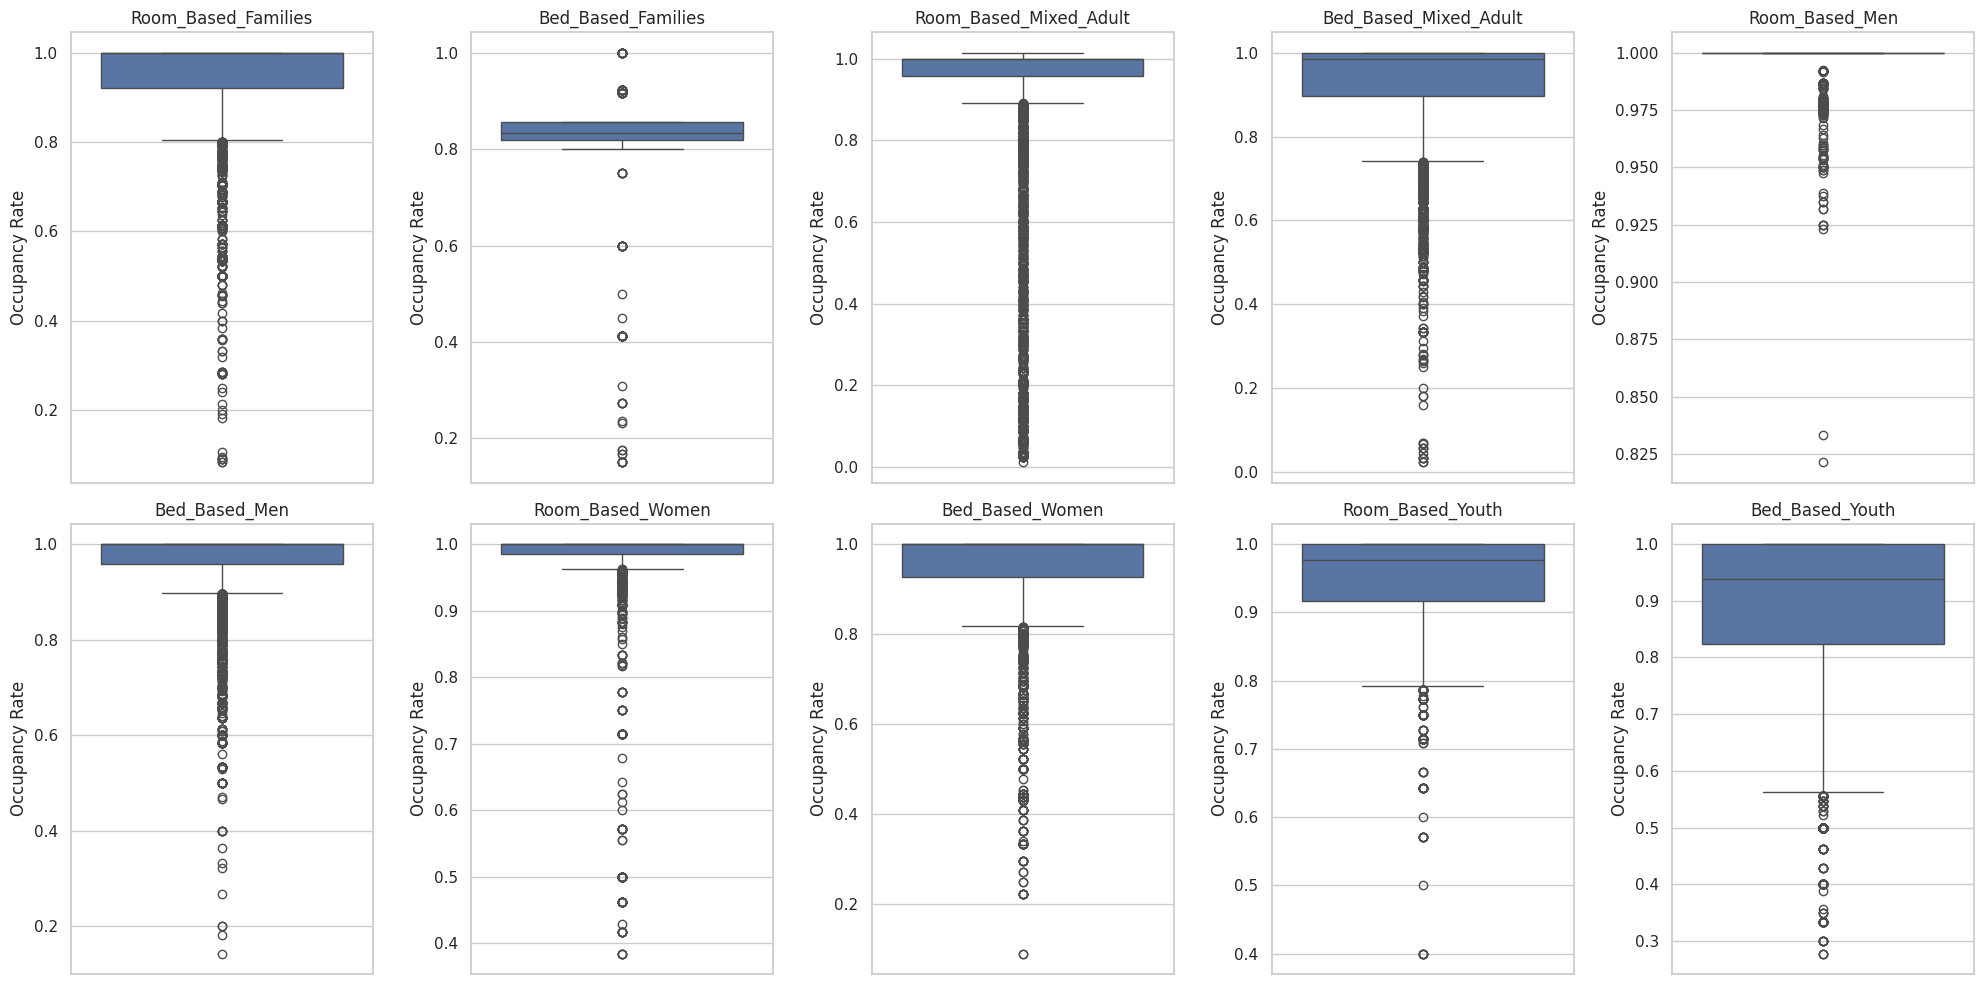

In [41]:
#Split the table by types in the SECTOR column
dt_room_based_men = dt_room_based[dt_room_based['SECTOR'] == 'Men']
dt_room_based_women = dt_room_based[dt_room_based['SECTOR'] == 'Women']
dt_room_based_youth = dt_room_based[dt_room_based['SECTOR'] == 'Youth']
dt_room_based_families = dt_room_based[dt_room_based['SECTOR'] == 'Families']
dt_room_based_mixed_adult = dt_room_based[dt_room_based['SECTOR'] == 'Mixed Adult']

dt_bed_based_men = dt_bed_based[dt_bed_based['SECTOR'] == 'Men']
dt_bed_based_women = dt_bed_based[dt_bed_based['SECTOR'] == 'Women']
dt_bed_based_youth = dt_bed_based[dt_bed_based['SECTOR'] == 'Youth']
dt_bed_based_families = dt_bed_based[dt_bed_based['SECTOR'] == 'Families']
dt_bed_based_mixed_adult = dt_bed_based[dt_bed_based['SECTOR'] == 'Mixed Adult']

# Creating the ten dataframes based on 'SECTOR'
sectors = data_sheet['SECTOR'].unique()
tables = {}
for sector in sectors:
    room_key = f"Room_Based_{sector.replace(' ', '_')}"
    bed_key = f"Bed_Based_{sector.replace(' ', '_')}"
    tables[room_key] = dt_room_based[dt_room_based['SECTOR'] == sector]
    tables[bed_key] = dt_bed_based[dt_bed_based['SECTOR'] == sector]

    # Calculating occupancy rates for each table
    tables[room_key]['OCCUPANCY_RATE'] = tables[room_key]['OCCUPIED_ROOMS'] / tables[room_key]['CAPACITY_ACTUAL_ROOM']
    tables[bed_key]['OCCUPANCY_RATE'] = tables[bed_key]['OCCUPIED_BEDS'] / tables[bed_key]['CAPACITY_ACTUAL_BED']

# Plotting boxplots for each table
plt.figure(figsize=(20, 10))
for i, (key, table) in enumerate(tables.items(), 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=table['OCCUPANCY_RATE'])
    plt.title(key)
    plt.ylabel('Occupancy Rate')

plt.tight_layout()
plt.show()

###Total Capacity

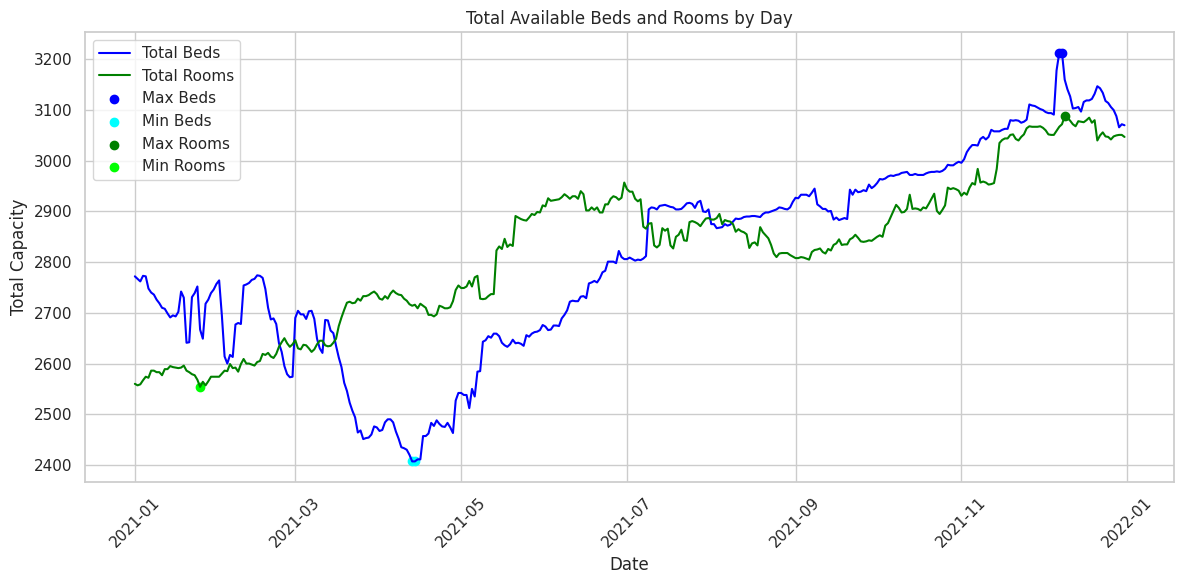

In [42]:
# Calculating total available beds/rooms by day
total_capacity_by_day = data_sheet.groupby('OCCUPANCY_DATE').agg({'CAPACITY_ACTUAL_BED': 'sum',
                                                                  'CAPACITY_ACTUAL_ROOM': 'sum'}).reset_index()
# Plotting the total values in a line graph
plt.figure(figsize=(12, 6))
plt.plot(total_capacity_by_day['OCCUPANCY_DATE'], total_capacity_by_day['CAPACITY_ACTUAL_BED'], label='Total Beds', color='blue')
plt.plot(total_capacity_by_day['OCCUPANCY_DATE'], total_capacity_by_day['CAPACITY_ACTUAL_ROOM'], label='Total Rooms', color='green')

# Calculate the highest and lowest points
max_bed = total_capacity_by_day['CAPACITY_ACTUAL_BED'].max()
min_bed = total_capacity_by_day['CAPACITY_ACTUAL_BED'].min()
max_room = total_capacity_by_day['CAPACITY_ACTUAL_ROOM'].max()
min_room = total_capacity_by_day['CAPACITY_ACTUAL_ROOM'].min()

# Annotating the highest and lowest points
plt.scatter(total_capacity_by_day['OCCUPANCY_DATE'][total_capacity_by_day['CAPACITY_ACTUAL_BED'] == max_bed],
            total_capacity_by_day['CAPACITY_ACTUAL_BED'][total_capacity_by_day['CAPACITY_ACTUAL_BED'] == max_bed],
            color='blue', label='Max Beds')
plt.scatter(total_capacity_by_day['OCCUPANCY_DATE'][total_capacity_by_day['CAPACITY_ACTUAL_BED'] == min_bed],
            total_capacity_by_day['CAPACITY_ACTUAL_BED'][total_capacity_by_day['CAPACITY_ACTUAL_BED'] == min_bed],
            color='cyan', label='Min Beds')
plt.scatter(total_capacity_by_day['OCCUPANCY_DATE'][total_capacity_by_day['CAPACITY_ACTUAL_ROOM'] == max_room],
            total_capacity_by_day['CAPACITY_ACTUAL_ROOM'][total_capacity_by_day['CAPACITY_ACTUAL_ROOM'] == max_room],
            color='green', label='Max Rooms')
plt.scatter(total_capacity_by_day['OCCUPANCY_DATE'][total_capacity_by_day['CAPACITY_ACTUAL_ROOM'] == min_room],
            total_capacity_by_day['CAPACITY_ACTUAL_ROOM'][total_capacity_by_day['CAPACITY_ACTUAL_ROOM'] == min_room],
            color='lime', label='Min Rooms')

plt.xlabel('Date')
plt.ylabel('Total Capacity')
plt.title('Total Available Beds and Rooms by Day')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


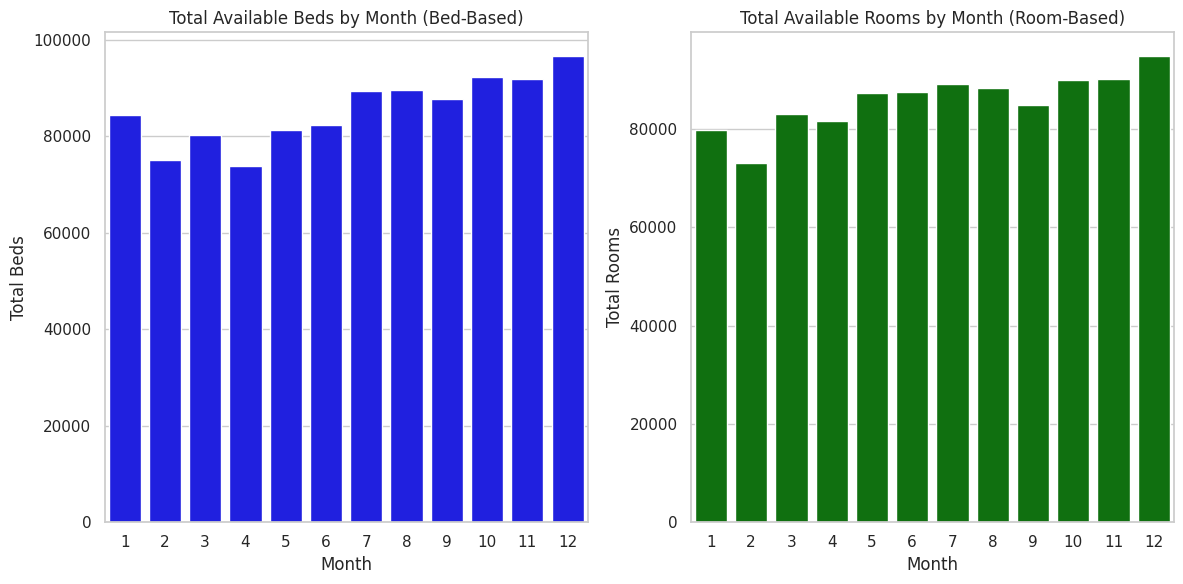

In [43]:
# Calculating the total available beds by months for bed and room-based shelters
# Adding a month column
data_sheet['Month'] = data_sheet['OCCUPANCY_DATE'].dt.month

# Grouping by month and capacity type
monthly_capacity = data_sheet.groupby(['Month', 'CAPACITY_TYPE']).agg({'CAPACITY_ACTUAL_BED': 'sum',
                                                                       'CAPACITY_ACTUAL_ROOM': 'sum'}).reset_index()

# Separating the data for bed and room-based shelters
monthly_bed_capacity = monthly_capacity[monthly_capacity['CAPACITY_TYPE'] != 'Room Based Capacity']
monthly_room_capacity = monthly_capacity[monthly_capacity['CAPACITY_TYPE'] == 'Room Based Capacity']

# Plotting the result in a bar chart
plt.figure(figsize=(12, 6))

# Bar chart for bed-based shelters
plt.subplot(1, 2, 1)
sns.barplot(x='Month', y='CAPACITY_ACTUAL_BED', data=monthly_bed_capacity, color='blue')
plt.title('Total Available Beds by Month (Bed-Based)')
plt.xlabel('Month')
plt.ylabel('Total Beds')

# Bar chart for room-based shelters
plt.subplot(1, 2, 2)
sns.barplot(x='Month', y='CAPACITY_ACTUAL_ROOM', data=monthly_room_capacity, color='green')
plt.title('Total Available Rooms by Month (Room-Based)')
plt.xlabel('Month')
plt.ylabel('Total Rooms')

plt.tight_layout()
plt.show()


### Program Model and Capacity

In [44]:
# Splitting the data based on 'PROGRAM_MODEL' and 'CAPACITY_TYPE'
program_models = data_sheet['PROGRAM_MODEL'].unique()
capacity_types = ['Room Based Capacity', 'Bed Based Capacity']

# Creating a dictionary to store the split data
split_data = {}

for program_model in program_models:
    for capacity_type in capacity_types:
        key = f"{program_model}_{capacity_type.replace(' ', '_')}"
        subset = data_sheet[(data_sheet['PROGRAM_MODEL'] == program_model) &
                            (data_sheet['CAPACITY_TYPE'] == capacity_type)]
        if capacity_type == 'Room Based Capacity':
            subset['OCCUPANCY_RATE'] = subset['OCCUPIED_ROOMS'] / subset['CAPACITY_ACTUAL_ROOM']
        else:
            subset['OCCUPANCY_RATE'] = subset['OCCUPIED_BEDS'] / subset['CAPACITY_ACTUAL_BED']
        split_data[key] = subset

# Showing results
split_data.keys()


<ipython-input-44-22e8d4bd6da5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['OCCUPANCY_RATE'] = subset['OCCUPIED_ROOMS'] / subset['CAPACITY_ACTUAL_ROOM']
<ipython-input-44-22e8d4bd6da5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['OCCUPANCY_RATE'] = subset['OCCUPIED_BEDS'] / subset['CAPACITY_ACTUAL_BED']
<ipython-input-44-22e8d4bd6da5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

dict_keys(['Emergency_Room_Based_Capacity', 'Emergency_Bed_Based_Capacity', 'Transitional_Room_Based_Capacity', 'Transitional_Bed_Based_Capacity', 'nan_Room_Based_Capacity', 'nan_Bed_Based_Capacity'])

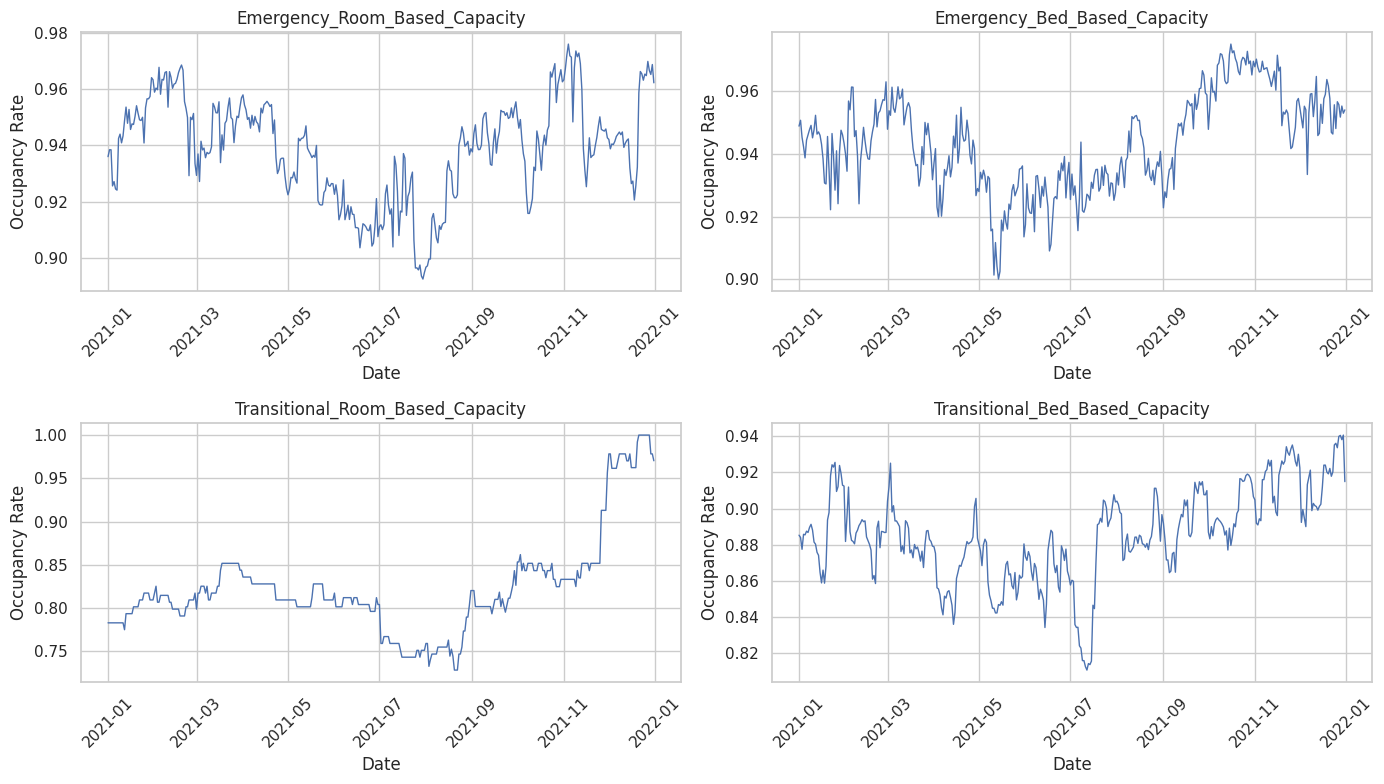

In [45]:
valid_keys = [key for key in split_data.keys() if 'nan' not in key]

#Plotting occupancy rates by capacity types and program models
plt.figure(figsize=(14, 8))

for i, key in enumerate(valid_keys, start=1):
    plt.subplot(2, 2, i)
    subset = split_data[key]
    daily_occupancy_rate = subset.groupby('OCCUPANCY_DATE')['OCCUPANCY_RATE'].mean()
    plt.plot(daily_occupancy_rate.index, daily_occupancy_rate.values, label=key, marker='', linestyle='-', linewidth=1)
    plt.title(key)
    plt.xlabel('Date')
    plt.ylabel('Occupancy Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

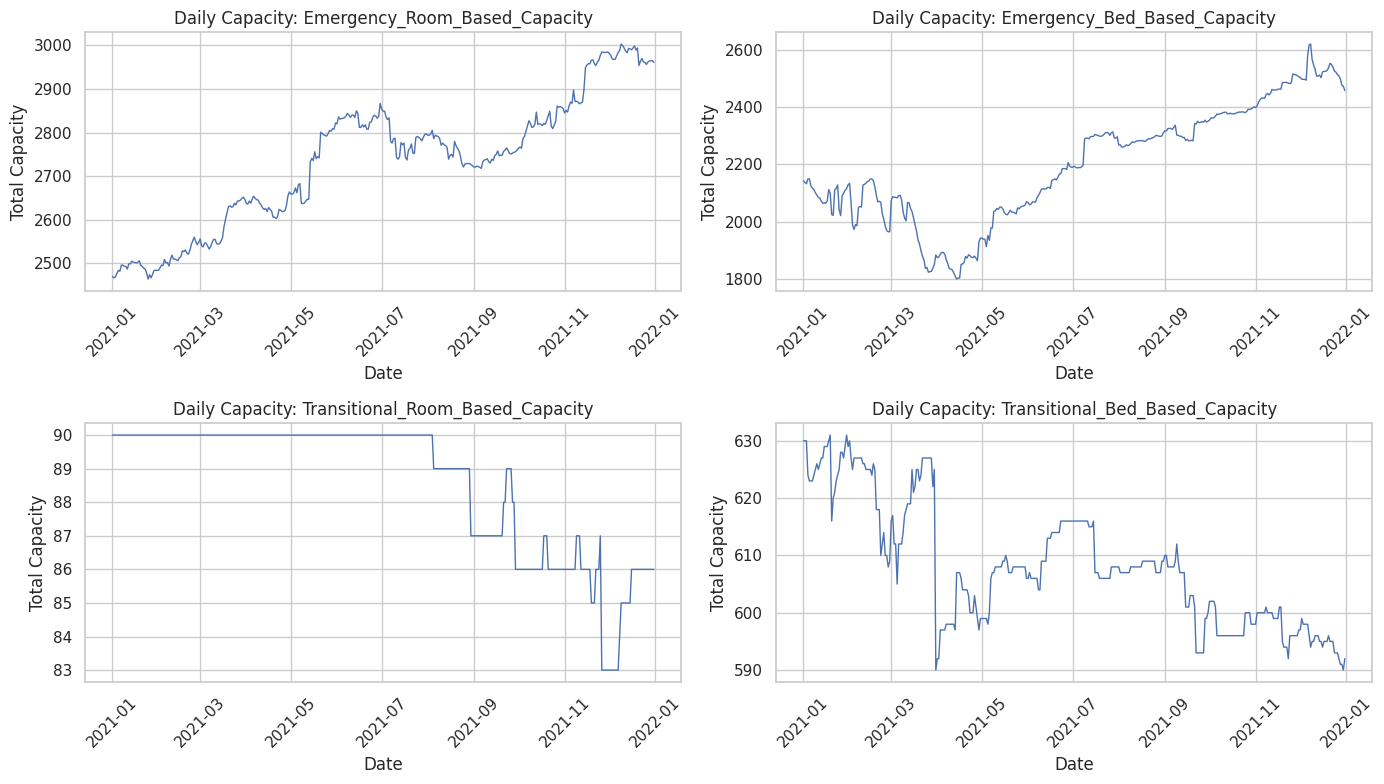

In [46]:
#Plotting total capacity by capacity types and program models
plt.figure(figsize=(14, 8))

for i, key in enumerate(valid_keys, start=1):
    plt.subplot(2, 2, i)
    subset = split_data[key]
    capacity_metric = 'CAPACITY_ACTUAL_ROOM' if 'Room' in key else 'CAPACITY_ACTUAL_BED'
    daily_capacity = subset.groupby('OCCUPANCY_DATE')[capacity_metric].sum()
    plt.plot(daily_capacity.index, daily_capacity.values, label=key, marker='', linestyle='-', linewidth=1)
    plt.title(f"Daily Capacity: {key}")
    plt.xlabel('Date')
    plt.ylabel('Total Capacity')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


### User Ratio

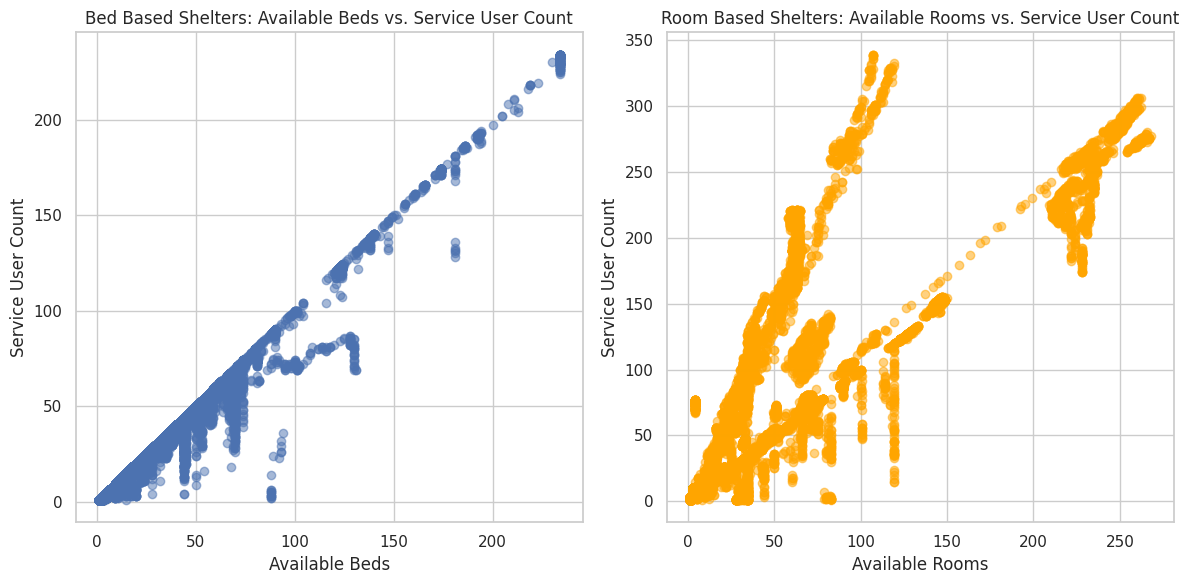

In [47]:
# Scatter plot for Bed Based and Room Based shelters
plt.figure(figsize=(12, 6))

# Scatter plot for Bed Based shelters
plt.subplot(1, 2, 1)
plt.scatter(dt_bed_based['CAPACITY_ACTUAL_BED'], dt_bed_based['SERVICE_USER_COUNT'], alpha=0.5)
plt.title('Bed Based Shelters: Available Beds vs. Service User Count')
plt.xlabel('Available Beds')
plt.ylabel('Service User Count')

# Scatter plot for Room Based shelters
plt.subplot(1, 2, 2)
plt.scatter(dt_room_based['CAPACITY_ACTUAL_ROOM'], dt_room_based['SERVICE_USER_COUNT'], alpha=0.5, color='orange')
plt.title('Room Based Shelters: Available Rooms vs. Service User Count')
plt.xlabel('Available Rooms')
plt.ylabel('Service User Count')

plt.tight_layout()
plt.show()


In [48]:
# Calculating the user-to-room ratio for room-based shelters
dt_room_based['USER_TO_ROOM_RATIO'] = dt_room_based['SERVICE_USER_COUNT'] / dt_room_based['OCCUPIED_ROOMS']

# Splitting the table into two based on the ratio
dt_room_based_high_ratio = dt_room_based[dt_room_based['USER_TO_ROOM_RATIO'] > 1.5]
dt_room_based_low_ratio = dt_room_based[dt_room_based['USER_TO_ROOM_RATIO'] <= 1.5]

# Show result
dt_room_based_low_ratio


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,ROOM_OCCUPANCY_RATE,USER_TO_ROOM_RATIO
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,3.0,3.0,1.000000,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,28.0,23.0,0.821429,1.043478
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,17.0,17.0,1.000000,1.470588
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,14.0,13.0,0.928571,1.000000
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,145.0,145.0,1.000000,1.055172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50913,2021-12-31,Street Haven At The Crossroads,15972,Street Haven Hotel Program,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,47,Room Based Capacity,33.0,33.0,1.000000,1.424242
50918,2021-12-31,The Salvation Army of Canada,15811,Salvation Army Florence Booth Hotel Program,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,71,Room Based Capacity,72.0,71.0,0.986111,1.000000
50920,2021-12-31,The Salvation Army of Canada,15491,SA Scarborough Hotel - Men's Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,128,Room Based Capacity,128.0,128.0,1.000000,1.000000
50923,2021-12-31,The Salvation Army of Canada,15871,Salvation Army New Hope Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,76,Room Based Capacity,76.0,76.0,1.000000,1.000000


### T-Tests

In [49]:
# Calculating the user-to-room/bed ratio for both bed and room-based shelters
dt_bed_based['USER_TO_BED_RATIO'] = dt_bed_based['SERVICE_USER_COUNT'] / dt_bed_based['CAPACITY_ACTUAL_BED']
dt_room_based['USER_TO_ROOM_RATIO'] = dt_room_based['SERVICE_USER_COUNT'] / dt_room_based['CAPACITY_ACTUAL_ROOM']

# Setting up a df to store the results from the t-tests
t_test_ratio_results = pd.DataFrame(columns=['Sector', 'P-Value (User-to-Room/Bed Ratio)'])

# Performing t-tests for each sector
for sector in sectors:
    bed_based_ratio = dt_bed_based[dt_bed_based['SECTOR'] == sector]['USER_TO_BED_RATIO'].dropna()
    room_based_ratio = dt_room_based[dt_room_based['SECTOR'] == sector]['USER_TO_ROOM_RATIO'].dropna()
    t_stat, p_value = stats.ttest_ind(bed_based_ratio, room_based_ratio, equal_var=False)
    t_test_ratio_results = t_test_ratio_results.append({'Sector': sector, 'P-Value (User-to-Room/Bed Ratio)': p_value}, ignore_index=True)

t_test_ratio_results

<ipython-input-49-36e005ac8996>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_ratio_results = t_test_ratio_results.append({'Sector': sector, 'P-Value (User-to-Room/Bed Ratio)': p_value}, ignore_index=True)
<ipython-input-49-36e005ac8996>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_ratio_results = t_test_ratio_results.append({'Sector': sector, 'P-Value (User-to-Room/Bed Ratio)': p_value}, ignore_index=True)
<ipython-input-49-36e005ac8996>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_ratio_results = t_test_ratio_results.append({'Sector': sector, 'P-Value (User-to-Room/Bed Ratio)': p_value}, ignore_index=True)
<ipython-input-49-36e005ac8996>:13: FutureWarning: The frame.append method is depr

,Sector,P-Value (User-to-Room/Bed Ratio)
0,Families,0.000000e+00
1,Mixed Adult,8.045580e-268
2,Men,9.406820e-34
3,Women,5.465853e-111
4,Youth,1.496019e-133


In [52]:
# Preparing data for t-tests
sectors = ['Men', 'Women', 'Youth', 'Families', 'Mixed Adult']

# Running t-tests for each sector
t_test_results = {}

for sector in sectors:
    bed_data = dt_bed_based[dt_bed_based['SECTOR'] == sector]['BED_OCCUPANCY_RATE'].dropna()
    room_data = dt_room_based[dt_room_based['SECTOR'] == sector]['ROOM_OCCUPANCY_RATE'].dropna()
    t_stat, p_value = stats.ttest_ind(bed_data, room_data, equal_var=False)
    t_test_results[sector] = p_value

# Showing results of the t-tests in a df
t_test_results_df = pd.DataFrame(list(t_test_results.items()), columns=['Sector', 'P-Value'])

t_test_results_df

,Sector,P-Value
0,Men,0.000000e+00
1,Women,5.961275e-38
2,Youth,1.496019e-133
3,Families,8.170315e-40
4,Mixed Adult,3.937029e-11


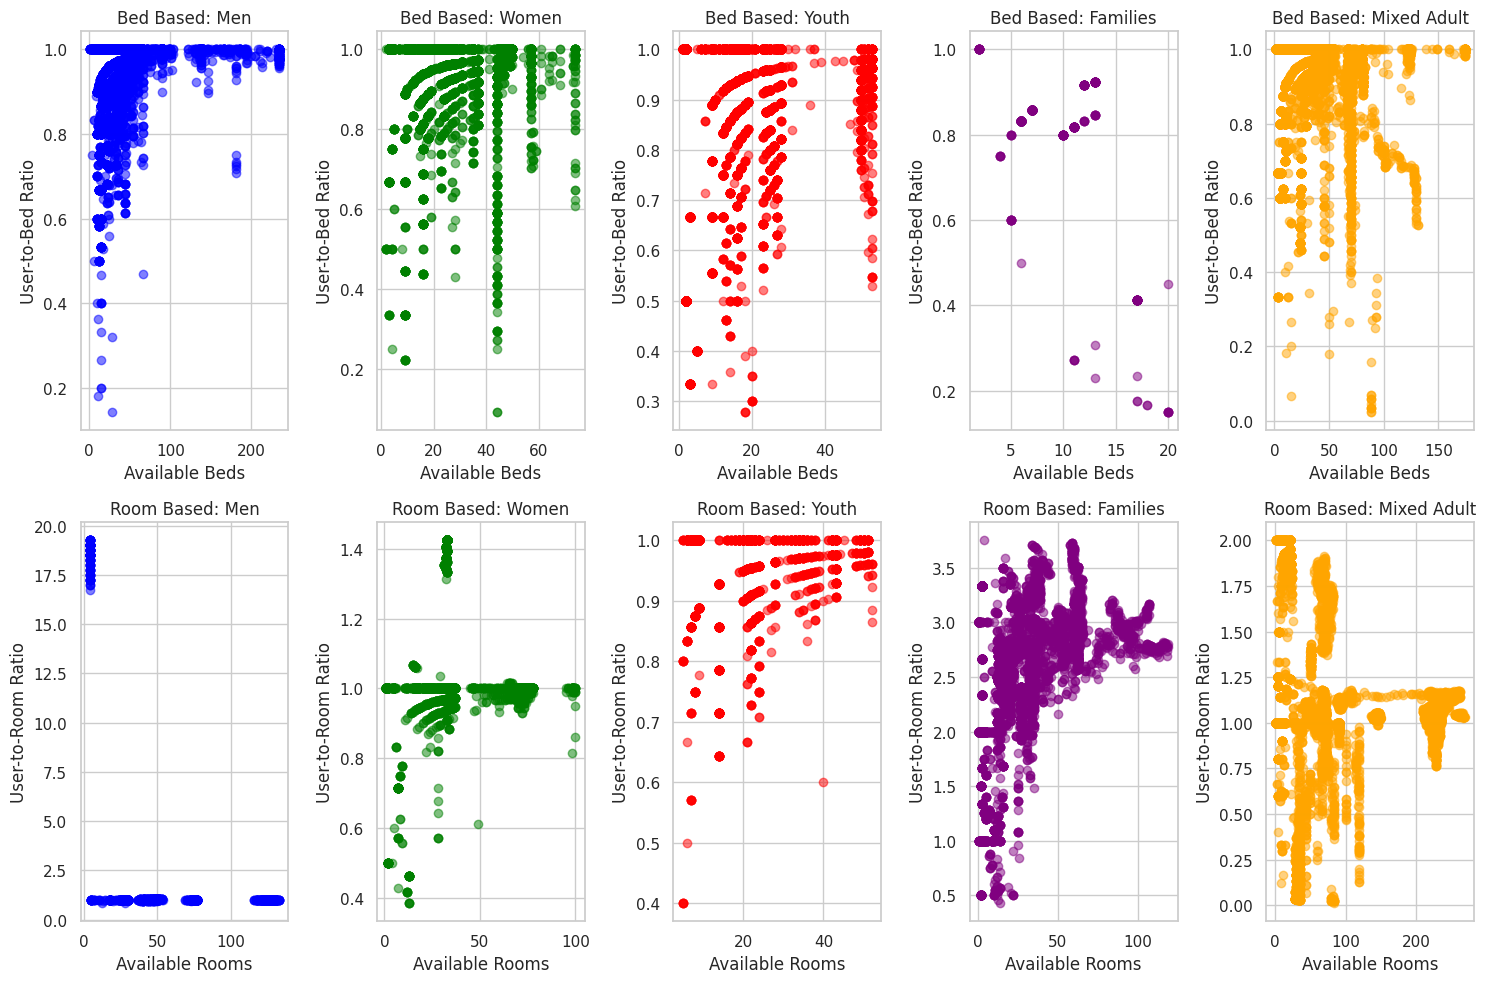

In [53]:
plt.figure(figsize=(15, 10))
colors = ['blue', 'green', 'red', 'purple', 'orange']
sectors = ['Men', 'Women', 'Youth', 'Families', 'Mixed Adult']

for i, sector in enumerate(sectors):
    bed_data = dt_bed_based[dt_bed_based['SECTOR'] == sector]
    room_data = dt_room_based[dt_room_based['SECTOR'] == sector]

    # Subplot for bed-based shelters
    plt.subplot(2, 5, i + 1)
    plt.scatter(bed_data['CAPACITY_ACTUAL_BED'], bed_data['USER_TO_BED_RATIO'], alpha=0.5, color=colors[i])
    plt.title(f'Bed Based: {sector}')
    plt.xlabel('Available Beds')
    plt.ylabel('User-to-Bed Ratio')

    # Subplot for room-based shelters
    plt.subplot(2, 5, i + 6)
    plt.scatter(room_data['CAPACITY_ACTUAL_ROOM'], room_data['USER_TO_ROOM_RATIO'], alpha=0.5, color=colors[i])
    plt.title(f'Room Based: {sector}')
    plt.xlabel('Available Rooms')
    plt.ylabel('User-to-Room Ratio')

plt.tight_layout()
plt.show()

In [57]:
# For Bed Based Shelters
bed_based_occupancy_stats = dt_bed_based['BED_OCCUPANCY_RATE'].describe()
bed_based_variance = dt_bed_based['BED_OCCUPANCY_RATE'].var()
bed_based_occupancy_stats['variance'] = bed_based_variance

# For Room Based Shelters
room_based_occupancy_stats = dt_room_based['ROOM_OCCUPANCY_RATE'].describe()
room_based_variance = dt_room_based['ROOM_OCCUPANCY_RATE'].var()
room_based_occupancy_stats['variance'] = room_based_variance

#Showing results
print("Bed Based Shelters Occupancy Rate Statistics:\n", bed_based_occupancy_stats)
print("\nRoom Based Shelters Occupancy Rate Statistics:\n", room_based_occupancy_stats)

Bed Based Shelters Occupancy Rate Statistics:
 count       32399.000000
mean            0.927885
std             0.122562
min             0.022727
25%             0.900000
50%             1.000000
75%             1.000000
max             1.000000
variance        0.015021
Name: BED_OCCUPANCY_RATE, dtype: float64

Room Based Shelters Occupancy Rate Statistics:
 count       18545.000000
mean            0.934087
std             0.163241
min             0.012048
25%             0.958333
50%             1.000000
75%             1.000000
max             1.014085
variance        0.026648
Name: ROOM_OCCUPANCY_RATE, dtype: float64


In [58]:
categories = [
    "Emergency_Room_Based_Capacity",
    "Emergency_Bed_Based_Capacity",
    "Transitional_Room_Based_Capacity",
    "Transitional_Bed_Based_Capacity"
]

#Setting up a df to store results
stats_results = {}

for category in categories:
    if category in split_data:
        subset = split_data[category]
        stats_results[category] = {
            'Standard Deviation': subset['OCCUPANCY_RATE'].std(),
            'Variance': subset['OCCUPANCY_RATE'].var(),
            'Max': subset['OCCUPANCY_RATE'].max(),
            'Min': subset['OCCUPANCY_RATE'].min()
        }

#Showing resulst
stats_df = pd.DataFrame(stats_results).T
stats_df

,Standard Deviation,Variance,Max,Min
Emergency_Room_Based_Capacity,0.163904,0.026864,1.014085,0.012048
Emergency_Bed_Based_Capacity,0.115901,0.013433,1.000000,0.022727
Transitional_Room_Based_Capacity,0.092578,0.008571,1.000000,0.666667
Transitional_Bed_Based_Capacity,0.129907,0.016876,1.000000,0.222222
